In [ ]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import numpy as np
import powerlaw
import math
from scipy.special import factorial

In [ ]:
%run Utilyties.ipynb

In [ ]:
data = read_data('../data/final/data_complete.json')

G = init_network(data)

Alcune informazioni iniziali sui dati sono:
* TOT Retweet =  29863
* TOT Quote =  1187
* TOT Mentions =  28068
* TOT Reply =  3000




In [ ]:
print(G.number_of_nodes())
print(G.number_of_edges())

16675
52373


In [ ]:
network_node_edge(G, 'G')

La rete G ha:

* Numero di nodi =  16675
* Numero di Edge =  52373


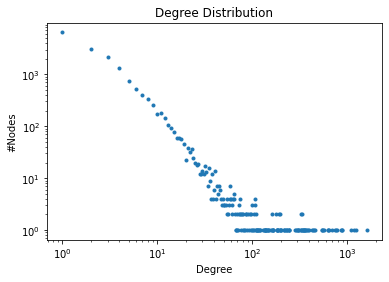

In [ ]:
hist = nx.degree_histogram(G)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

In [ ]:
Degree=[]
n_nodes=[]

i=1
while i<len(hist):
    n_nodes.append(hist[i])
    Degree.append(i)
    i+=1
    
np.asarray(Degree)
np.asarray(n_nodes)

array([6399, 3025, 2112, ...,    0,    0,    1])

In [ ]:
lung=len(Degree)
Degree_1=[]
n_nodes_1=[]
i=0
while (i<len(Degree)):
    if (Degree[i]>=3 and Degree[i]<=19): #per prendere la retta
        Degree_1.append(Degree[i])
        n_nodes_1.append(n_nodes[i])
    i+=1   

In [ ]:
i=0
while(i<len(Degree_1)):
    if(Degree[i]!=0):
        Degree_1[i]=math.log(Degree_1[i])
    if(n_nodes_1[i]!=0):
        n_nodes_1[i]=math.log(n_nodes_1[i])
    i+=1

In [ ]:
x=Degree_1
y=n_nodes_1

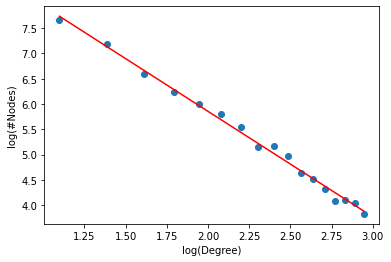

[0.04111596 0.09601721]
-2.0858581622234134 10.026903668055844


In [ ]:
p,cov = np.polyfit(x,y,1,cov=True)
plt.plot(x,y,'o')
plt.plot(x,np.polyval(p,x),'r')
plt.xlabel("log(Degree)")
plt.ylabel("log(#Nodes)")
plt.show()

print (np.sqrt(np.diag(cov)))
print(p[0], p[1]) #coeff. angolare e intercetta

In [ ]:
a=[]
b=[]
c=[]
for i in range (len(x)):
    a.append(math.e**x[i])
    b.append(math.e**y[i])
    c.append(math.e**p[1]/(a[i]**(-p[0]))) #y=k/x^alpha => e^log(y)=e^log(k)/e^(alpha*log(x))

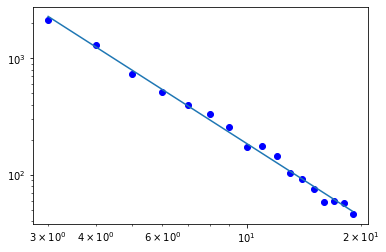

In [ ]:
plt.plot(a,b, 'bo')
plt.plot(a, c)
plt.loglog()
plt.show()

In [ ]:
N=G.number_of_nodes()
L=G.number_of_edges()
mean=2*L/N

In [ ]:
t = Degree
poissont = np.exp(-mean)*np.power(mean, t)/factorial(t)


<ipython-input-15-f2f3918faa89>:2: RuntimeWarning: overflow encountered in power
  poissont = np.exp(-mean)*np.power(mean, t)/factorial(t)
<ipython-input-15-f2f3918faa89>:2: RuntimeWarning: invalid value encountered in true_divide
  poissont = np.exp(-mean)*np.power(mean, t)/factorial(t)


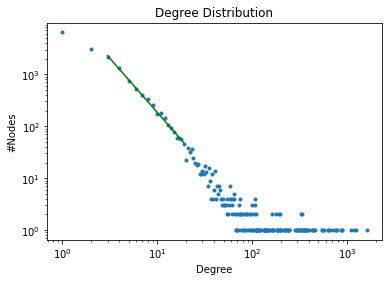

In [ ]:
hist = nx.degree_histogram(G)
plt.plot(range(0, len(hist)), hist, ".")
plt.plot(a, c, 'g')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
ax = plt.gca()
plt.show()

In [ ]:
for i in range (len(hist)):
    hist[i]=hist[i]/N
for i in range (len(c)):
    c[i]=c[i]/N

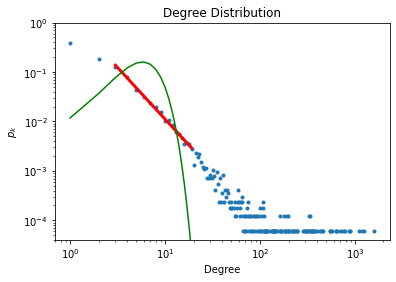

In [ ]:
plt.plot(range(0, len(hist)), hist, ".")
plt.plot(a, c, 'r', linewidth=3.0)
plt.plot(t, poissont, 'g')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("$p_k$")
plt.loglog()
ax = plt.gca()
ax.set_ylim([0.00004, 1])
plt.show()

In [ ]:
chi_squared = np.sum((np.polyval(p, x) - y) ** 2/(np.polyval(p, x))) 
print(chi_squared/(len(x)-2))
print(len(x)-2)

0.0016323774070730473
15
